In [3]:
import pandas as pd

df_exploded = pd.read_csv("data/graph_data.csv")
df_exploded.head()

,from_label,from_tconst,from_title,from_year,from_runtimeMinutes,from_averageRating,from_numVotes,from_budget,from_revenue,relationship,to_label,to_name,to_id,to_gender,to_popularity,to_adult
0,Movie,tt14513804,Captain America: Brave New World,2025.0,118,5.9,75784,180000000,388056272,IN_GENRE,Genre,Action,NaN,NaN,NaN,NaN
1,Movie,tt14513804,Captain America: Brave New World,2025.0,118,5.9,75784,180000000,388056272,IN_GENRE,Genre,Adventure,NaN,NaN,NaN,NaN
2,Movie,tt14513804,Captain America: Brave New World,2025.0,118,5.9,75784,180000000,388056272,IN_GENRE,Genre,Sci-Fi,NaN,NaN,NaN,NaN
3,Movie,tt14513804,Captain America: Brave New World,2025.0,118,5.9,75784,180000000,388056272,HAS_SUBGENRE,Subgenre,action-epic,NaN,NaN,NaN,NaN
4,Movie,tt14513804,Captain America: Brave New World,2025.0,118,5.9,75784,180000000,388056272,HAS_SUBGENRE,Subgenre,epic-adventure,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd

# List of columns to keep
cols_to_keep = [
    "from_tconst",
    "from_title",
    "from_year",
    "from_runtimeMinutes",
    "from_averageRating",
    "from_numVotes",
    "from_budget",
    "from_revenue"
]

# Reduce to one row per movie by grouping and taking the first non-null value
df_reduced = (
    df_exploded[cols_to_keep]
    .groupby("from_tconst", as_index=False)
    .first()
)

df_reduced.head()

,from_tconst,from_title,from_year,from_runtimeMinutes,from_averageRating,from_numVotes,from_budget,from_revenue
0,tt0035423,Kate & Leopold,2001.0,118,6.4,91466,48000000,76019048
1,tt0065134,Two Mules for Sister Sara,1970.0,116,7.0,31918,2500000,5050000
2,tt0065377,Airport,1970.0,137,6.6,22999,10000000,100489151
3,tt0065462,Beneath the Planet of the Apes,1970.0,95,6.0,55550,3000000,18999718
4,tt0065466,Beyond the Valley of the Dolls,1970.0,109,6.1,12467,2090000,9000000


FileNotFoundError: [Errno 2] No such file or directory: 'unexploded_data.csv'

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

def plot_distribution(col, log_scale=False, bins=50):
    plt.figure()
    sns.histplot(df[col].dropna(), bins=bins, kde=True)
    if log_scale:
        plt.xscale("log")
    plt.title(f"Distribution of {col.replace("from_", "")}")
    plt.xlabel(col.replace("from_", ""))
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


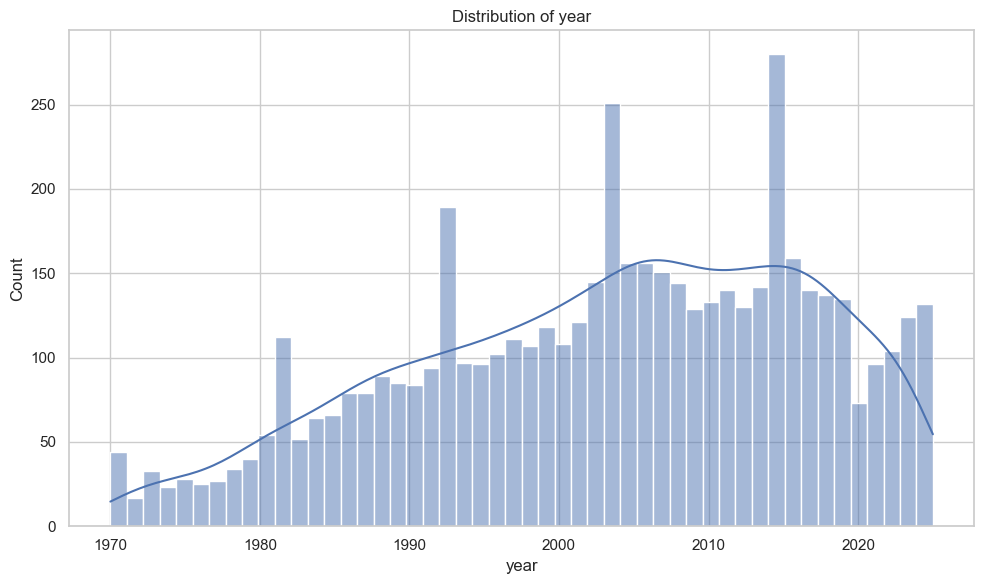

In [8]:
df = df_reduced.copy()

plot_distribution("from_year")

#plot_distribution("from_budget", log_scale=True)
#plot_distribution("from_revenue", log_scale=True)


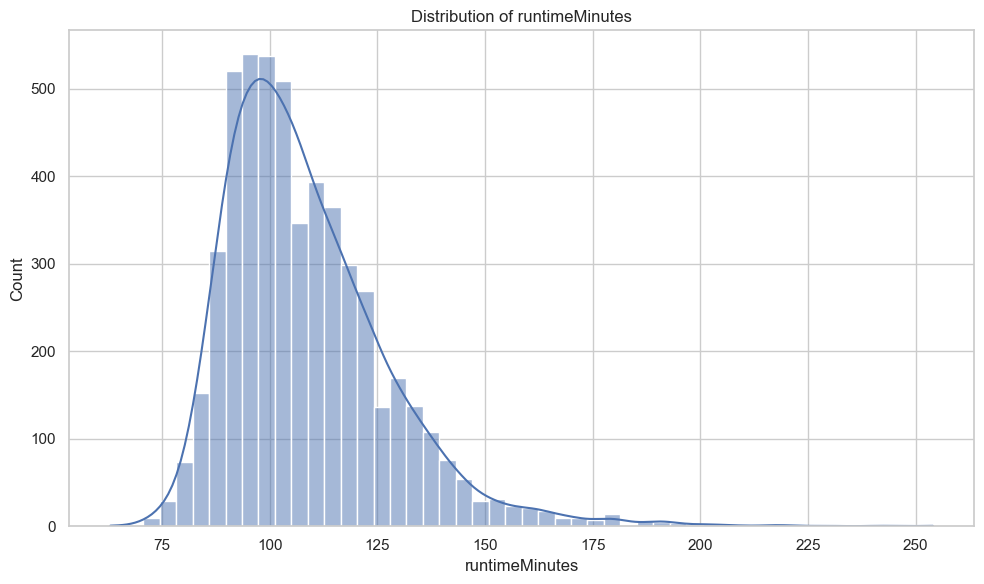

In [10]:
plot_distribution("from_runtimeMinutes")

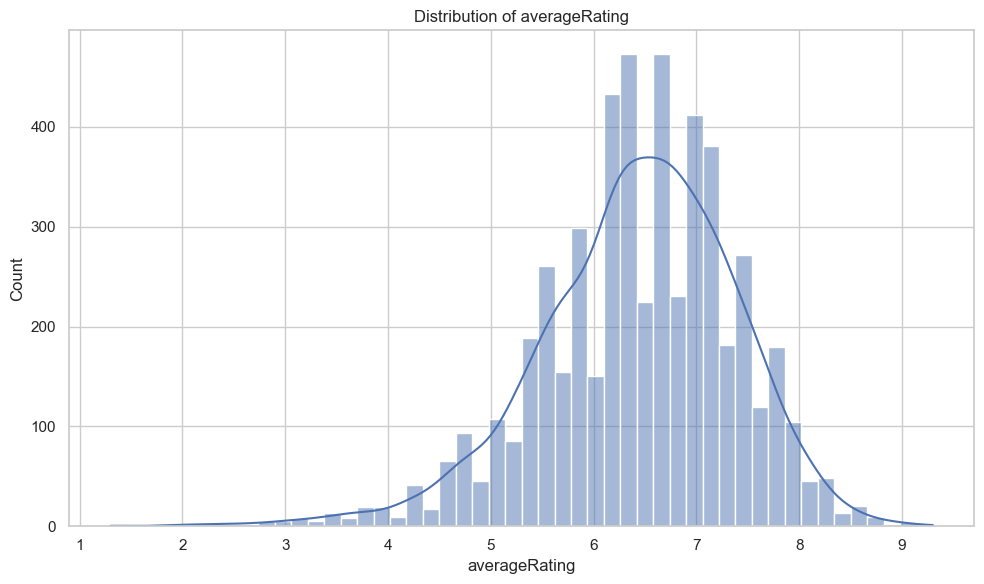

In [12]:
plot_distribution("from_averageRating")

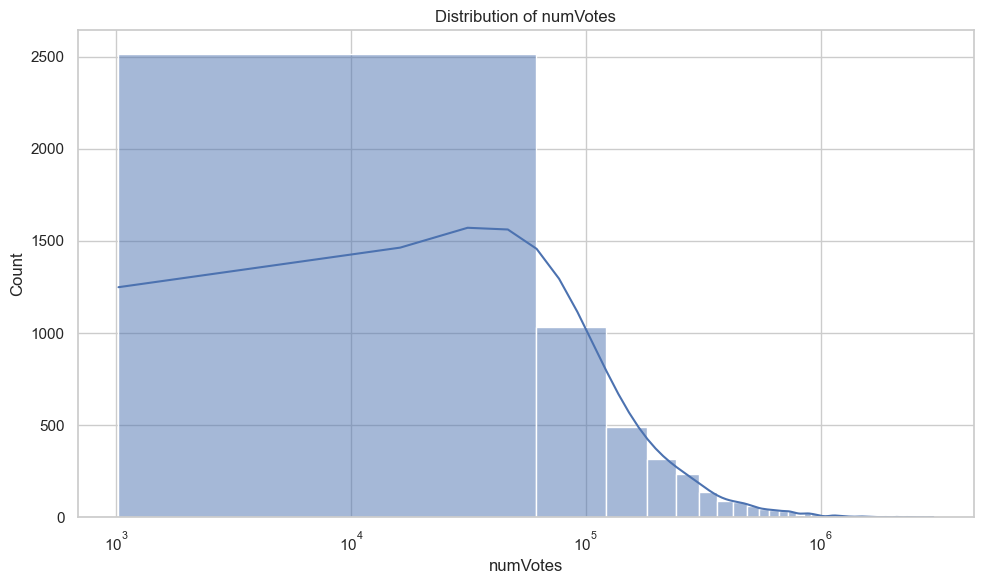

In [13]:
plot_distribution("from_numVotes", log_scale=True)

In [16]:
eda_cols = [
    "from_year",
    "from_runtimeMinutes",
    "from_averageRating",
    "from_numVotes",
    "from_budget",
    "from_revenue"
]

# Temporarily disable scientific notation
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(df[eda_cols].describe().T)

#df[eda_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
from_year,"5,235","2,003",13,"1,970","1,993","2,005","2,014","2,025"
from_runtimeMinutes,"5,235",109,19,63,95,105,118,254
from_averageRating,"5,235",6,1,1,6,6,7,9
from_numVotes,"5,235","146,071","236,076","1,021","23,376","64,929","164,704","3,019,321"
from_budget,"5,235","36,316,464","47,402,880",0,"6,000,000","20,000,000","45,000,000","460,000,000"
from_revenue,"5,235","109,952,263","203,082,073","500,000","10,602,493","38,000,000","117,554,065","2,923,706,026"


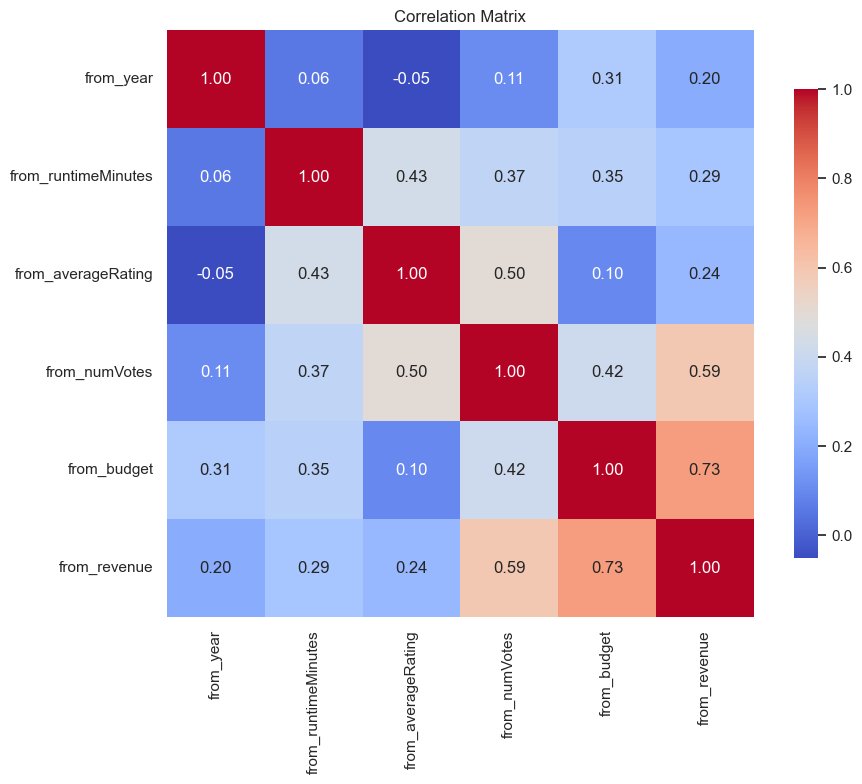

In [17]:
# Compute correlation matrix
corr = df[eda_cols].corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


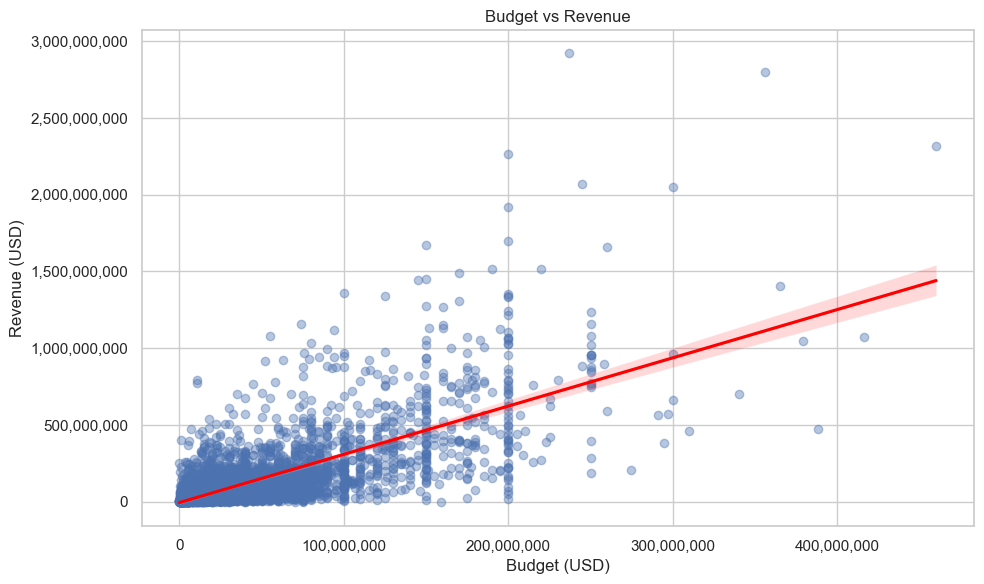

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load your unexploded DataFrame (replace with actual load if not already in memory)
df_unexploded = pd.read_csv("path_to_graph_data.csv")
# Assuming you already have df_unexploded defined

# Filter out missing or zero values
df_plot = df[
    (df["from_budget"] > 0) & 
    (df["from_revenue"] > 0)
]

# Optional: use log scale if the spread is too wide
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_plot,
    x="from_budget",
    y="from_revenue",
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title("Budget vs Revenue")
plt.xlabel("Budget (USD)")
plt.ylabel("Revenue (USD)")

formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()
